In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srn
import os

In [2]:
dataset = pd.read_csv('dataset.csv')

In [3]:
dataset

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,Female,45,0,0,0,Mirpur,Undeveloped,Building,Dhaka,0
1,Male,17,0,0,1,Chawkbazar,Developed,Building,Dhaka,0
2,Female,29,0,0,0,Paltan,Undeveloped,Other,Dhaka,0
3,Female,63,1,1,0,Motijheel,Developed,Other,Dhaka,1
4,Male,22,0,0,0,Gendaria,Undeveloped,Building,Dhaka,0
...,...,...,...,...,...,...,...,...,...,...
995,Female,16,1,1,0,New Market,Developed,Building,Dhaka,1
996,Male,41,1,1,0,Paltan,Undeveloped,Other,Dhaka,1
997,Male,45,0,0,1,Motijheel,Developed,Building,Dhaka,0
998,Female,19,1,1,1,Paltan,Undeveloped,Building,Dhaka,1


In [4]:
genero = dataset.groupby(['Gender']).size()
genero

Gender
Female    524
Male      476
dtype: int64

In [5]:
idade = dataset.groupby(['Age']).size()
idade

Age
8     17
9     20
10    23
11    18
12    11
13    19
14    18
15    16
16    18
17    23
18    18
19    17
20    17
21    14
22    18
23    14
24    16
25    14
26    17
27    16
28    17
29    24
30    15
31    22
32    15
33    14
34    16
35    19
36    12
37    19
38    18
39    23
40    24
41    14
42    16
43    13
44    24
45    24
46    20
47    19
48    15
49    18
50    24
51    17
52    19
53    20
54    17
55    16
56    13
57    13
58    13
59    11
60    12
61    17
62    22
63    10
64    15
65    16
dtype: int64

In [6]:
ns1 = dataset.groupby(['NS1']).size()
ns1

NS1
0    481
1    519
dtype: int64

In [7]:
igg = dataset.groupby(['IgG']).size()
igg

IgG
0    467
1    533
dtype: int64

In [8]:
igm = dataset.groupby(['IgM']).size()
igm

IgM
0    525
1    475
dtype: int64

In [9]:
area = dataset.groupby(['Area']).size()
area

Area
Adabor                 22
Badda                  31
Banasree               29
Bangshal               34
Biman Bandar           30
Bosila                 24
Cantonment             20
Chawkbazar             22
Demra                  38
Dhanmondi              34
Gendaria               22
Gulshan                28
Hazaribagh             25
Jatrabari              38
Kadamtali              34
Kafrul                 26
Kalabagan              27
Kamrangirchar          26
Keraniganj             33
Khilgaon               23
Khilkhet               30
Lalbagh                17
Mirpur                 34
Mohammadpur            28
Motijheel              27
New Market             33
Pallabi                23
Paltan                 31
Ramna                  30
Rampura                30
Sabujbagh              23
Shahbagh               24
Sher-e-Bangla Nagar    23
Shyampur               19
Sutrapur               31
Tejgaon                31
dtype: int64

In [10]:
areat = dataset.groupby(['AreaType']).size()
areat

AreaType
Developed      501
Undeveloped    499
dtype: int64

In [11]:
houset = dataset.groupby(['HouseType']).size()
houset

HouseType
Building    354
Other       329
Tinshed     317
dtype: int64

In [12]:
dataset.groupby(['District']).size()

District
Dhaka    1000
dtype: int64

In [13]:
classe = dataset.groupby(['Outcome']).size()
classe

Outcome
0    467
1    533
dtype: int64

<Axes: xlabel='HouseType'>

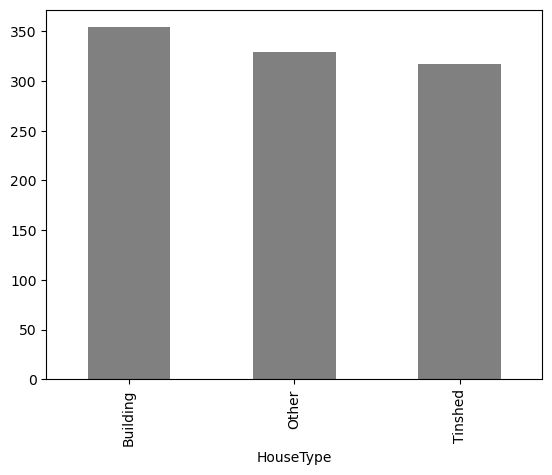

In [14]:
houset.plot.bar(color = 'grey')

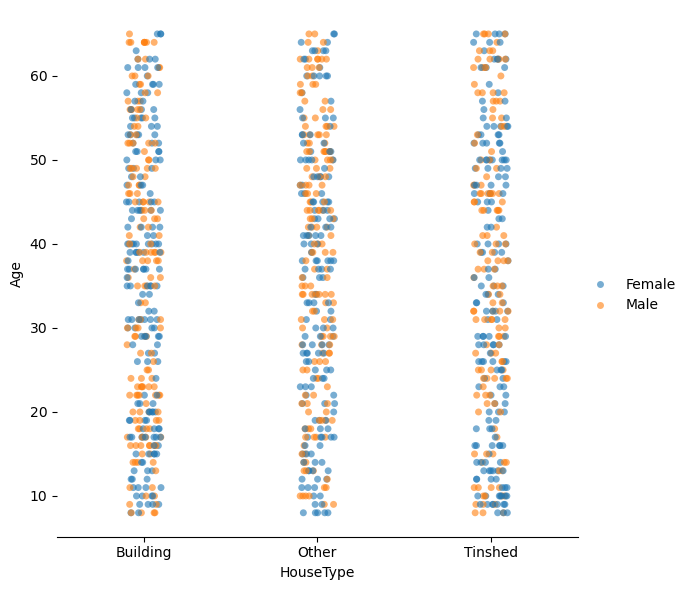

In [15]:
g= srn.catplot(data=dataset, x='HouseType', y='Age', hue='Gender', alpha=.6, height=6)
g.despine(left=True)
g.legend.set_title("")

In [16]:
os.makedirs('dados_dengue', exist_ok=True)

In [17]:
for i, row in dataset.iterrows():
    conteudo = (
        f"Pessoa {i + 1}\n"
        f"Genero: {row['Gender']}\n"
        f"Idade: {row['Age']}\n"
        f"NS1: {row['NS1']}\n"
        f"IgG: {row['IgG']}\n"
        f"IgM: {row['IgM']}\n"
        f"Área: {row['Area']}\n"
        f"Tipo de área: {row['AreaType']}\n"
        f"Tipo de casa: {row['HouseType']}\n"
        f"Outcome: {'Tem dengue' if row['Outcome'] == 1 else 'Não tem dengue'}\n"
    )

    with open(f'dados_dengue/pessoa_{i + 1}.txt', 'w', encoding='utf-8') as file:
        file.write(conteudo)

print('Arquivos gerados na pasta dados_dengue')

Arquivos gerados na pasta dados_dengue


In [18]:
import ollama

In [19]:
model = "gemma2:2b"

In [20]:
resposta = ollama.generate(
    model=model,
    prompt= """responda em portugues, essa pessoa:
    Gênero: Feminino

Idade: 28 anos

IgG: 2.5 (↑ elevado — indica infecção antiga ou secundária)

IgM: 4.8 (↑ elevado — indica infecção recente ou ativa)

Área: Zona Urbana

Tipo de Área: Residencial

Tipo de Casa: Casa térrea de alvenaria

tem dengue?
    """
)

In [21]:
print(resposta['response'])

A combinação de IgG elevado e IgM elevado sugere que a pessoa pode ter sido exposta à dengue no passado. No entanto, **não é possível determinar com base nesta informação se a pessoa tem dengue atualmente.** 

**Por que?**

* **IgG alto:** Indica uma infecção passada, mas não necessariamente atual.
* **IgM alto:** Indicação de infecção recente ou ativa.

Para confirmar se a pessoa está contaminada por dengue, é necessário realizar um exame de diagnóstico específico para a doença (exame de PCR).  A presença de sintomas como febre alta, dor de cabeça intensa, dores musculares e erupções cutâneas também podem indicar dengue. 

**É importante:**

* O paciente deve procurar atendimento médico para receber avaliação adequada.
* Não se auto-diagnosticar ou tratar sem orientação médica. 


Lembre-se: A automedicação pode ser perigosa!


In [22]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.llms.ollama import Ollama
from llama_index.core.settings import Settings

In [23]:
Settings.llm = Ollama(model = model)
Settings.embed_model = HuggingFaceEmbedding(model_name="BAAI/bge-small-en-v1.5")

In [24]:
documentos = SimpleDirectoryReader("dados_dengue").load_data()
index = VectorStoreIndex.from_documents(documentos)
query_engine = index.as_query_engine()

In [28]:
def avaliar_paciente(genero: str, idade: int, ns1: int, igg: int, igm: int, area: str, areat: str, casat: str) -> str:
    prompt = (
        f"""Você é um especialista médico em doenças infecciosas. Sua função é avaliar se um paciente possui sinais que indicam dengue, com base nos seguintes critérios médicos:
- Lembre-se de responder em Português-BR
- NS1 positivo indica alta probabilidade de dengue.
- IgM elevado (>1.0) indica infecção recente, compatível com dengue.
- IgG elevado isolado (>1.0) geralmente indica infecção passada, mas se acompanhado de IgM elevado, reforça dengue recente.
- Febre, área residencial com alta incidência de dengue e tipo de moradia (como alvenaria em áreas desenvolvidas) também são fatores relevantes.

Aqui estão os dados do paciente:

- Gênero: {genero}
- Idade: {idade}
- NS1: {ns1}
- IgG: {igg}
- IgM: {igm}
- Área: {area}
- Tipo de Área: {areat}
- Tipo de casa: {casat}

        'Sim, é possível que você esteja com dengue, mas lembre-se de consultar um médico.' 
        ou
        'Não, é improvável que você esteja com dengue, mas lembre-se de consultar um médico.' 
        Escreva a frase completa.

Explique o motivo técnico da sua resposta, sem repetir e em português."""



    )

    resposta = query_engine.query(prompt)
    return resposta.response.strip()

print(avaliar_paciente("Masculino", 42, 1, 1.2, 5.6, "Zona Rural", "Desenvolvida", "Alvenaria"))

'Sim, é possível que você esteja com dengue, pois os critérios indicam isso. No entanto, a presença de IgG elevado (1.2), e IgM elevado (5.6) pode indicar infecção recente e reforça o risco de dengue.' 

**Motivo técnico:** O contexto apresentado leva em consideração a probabilidade de dengue, com base no NS1 positivo e IgM elevado.  A IgG elevado isolado (>1.0) geralmente indica infecção passada, mas se acompanhado de IgM elevado, reforça a presença de dengue recente. Além disso, o tipo de moradia (alvenaria em áreas desenvolvidas) e a área geográfica (Zona Rural) são relevantes para a avaliação da probabilidade de dengue.
